MSE: 0.7987318131762663
RMSE: 0.8937179718324267
MAE: 0.7302163747929252
R al cuadrado: -0.2222259398563886
R cuadrado ajustado: -0.2299371445242524


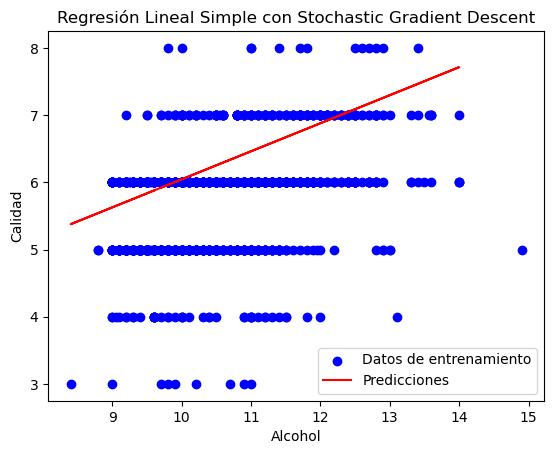

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos
data = pd.read_csv('winequality-red.csv', delimiter=';')

# Seleccionar las columnas de interés
X = data[['alcohol']].values  # Atributo 'alcohol'
y = data['quality'].values  # Variable objetivo 'quality'

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Agregar una columna de unos para el término de sesgo
X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

# Inicializar los parámetros del modelo
theta = np.zeros(X_train.shape[1])

# Definir la función de costo (MSE)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = np.dot(X, theta)
    cost = np.sum((predictions - y) ** 2) / (2 * m)
    return cost

# Definir el descenso de gradiente estocástico
def stochastic_gradient_descent(X, y, theta, learning_rate, num_epochs):
    m = len(y)
    costs = []
    for epoch in range(num_epochs):
        cost_sum = 0
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            prediction = np.dot(xi, theta)
            gradient = np.dot(xi.T, (prediction - yi))
            theta -= learning_rate * gradient
            cost = compute_cost(xi, yi, theta)
            cost_sum += cost
        avg_cost = cost_sum / m
        costs.append(avg_cost)
    return theta, costs

# Hiperparámetros del descenso de gradiente estocástico
learning_rate = 0.01
num_epochs = 100

# Ejecutar el descenso de gradiente estocástico
theta, costs = stochastic_gradient_descent(X_train, y_train, theta, learning_rate, num_epochs)

# Realizar predicciones en el conjunto de prueba
y_test_pred = np.dot(X_test, theta)

# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Imprimir las métricas de evaluación
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R al cuadrado:', r2)
print('R cuadrado ajustado:', adj_r2)

# Visualizar los datos de entrenamiento y las predicciones
plt.scatter(X_train[:, 1], y_train, color='b', label='Datos de entrenamiento')
plt.plot(X_test[:, 1], y_test_pred, color='r', label='Predicciones')
plt.xlabel('Alcohol')
plt.ylabel('Calidad')
plt.title('Regresión Lineal Simple con Stochastic Gradient Descent')
plt.legend()
plt.show()
